# Cleaning Quarterback Dataset

Author: Ermina Mujan

Date: April 19, 2021

This dataset is from kaggle user mur418. It contains data on NFL tight end players for 2019 actuals and 2020 projections

### Import packages and data

In [4]:
import pandas as pd # we are using pandas for data manipulation and analysis

import missingno as msno # we are using missingno to visualize the distribution of NaN(Not a Number) values

In [5]:
# bring in the quarterback dataset as a pandas dataframe 

df = pd.read_csv('/Users/erminamujan/Downloads/qb_stats_and_projections.csv')

### Inspect the dataset's shape, head, and column names

In [6]:
# see how many rows and columns are in this dataset

shape_info = df.shape # set the dataframe's "shape" to a variable

In [7]:
print('This dataset evaluates {} quarterbacks based on data from {} columns' # print this phrase with variables added in
      .format(shape_info[0], # using the .format method, insert the number of rows in the dataframe
              shape_info[1])) # using the .format method, insert the number of columns in the dataframe

This dataset evaluates 124 quarterbacks based on data from 23 columns


In [8]:
df.head() # look at the first 5 rows of the quarterback dataset

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS,2020 OUTLOOK
0,1,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,...,296.0,465.0,3425.0,25.0,10.0,156.0,902.0,6.0,338.23,The 2019 NFL MVP is fresh off a breakout seaso...
1,2,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,...,364.0,557.0,4465.0,32.0,10.0,61.0,280.0,3.0,332.66,Patrick Mahomes is 24 years old and has 36 NFL...
2,3,Deshaun Watson,Texans,QB,333.0,495.0,3852.0,26.0,12.0,82.0,...,337.0,517.0,4018.0,27.0,12.0,87.0,519.0,4.0,314.06,Watson enters his fourth NFL season fresh off ...
3,4,Dak Prescott,Cowboys,QB,388.0,596.0,4902.0,30.0,11.0,52.0,...,350.0,543.0,4280.0,27.0,11.0,49.0,248.0,4.0,301.71,Prescott will be back under center for Dallas ...
4,5,Russell Wilson,Seahawks,QB,341.0,516.0,4110.0,31.0,5.0,75.0,...,300.0,473.0,3692.0,29.0,9.0,73.0,397.0,2.0,293.96,The 2019 season was a tale of two halves for W...


In [9]:
df.tail() # look at the last 5 rows of the quarterback dataset

,Unnamed: 0,PLAYER NAME,TEAM NAME,PLAYER POSITION,2019 COMPLETED PASS,2019 ATTEMPTED PASS,2019 PASSING YDS,2019 PASSING TD,2019 INT,2019 CAR,...,2020 COMPLETED PASS,2020 ATTEMPTED PASS,2020 PASSING YDS,2020 PASSING TD,2020 INT,2020 CAR,2020 RUSH YDS,2020 RUSH TD,2020 FPTS,2020 OUTLOOK
119,120,Matt Cassel,FA,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
120,121,Mark Sanchez,FA,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
121,122,Sam Bradford,FA,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
122,123,Nick Fitzgerald,FA,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.
123,124,Tyree Jackson,Bills,QB,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,No outlook available.


In [10]:
list(df) # listing all column names

['Unnamed: 0',
 'PLAYER NAME',
 'TEAM NAME',
 'PLAYER POSITION',
 '2019 COMPLETED PASS',
 '2019 ATTEMPTED PASS',
 '2019 PASSING YDS',
 '2019 PASSING TD',
 '2019 INT',
 '2019 CAR',
 '2019 RUSH YDS',
 '2019 RUSH TD',
 '2019 FPTS',
 '2020 COMPLETED PASS',
 '2020 ATTEMPTED PASS',
 '2020 PASSING YDS',
 '2020 PASSING TD',
 '2020 INT',
 '2020 CAR',
 '2020 RUSH YDS',
 '2020 RUSH TD',
 '2020 FPTS',
 '2020 OUTLOOK']

### Begin cleaning the dataset by improving readability of column names and dropping unnecessary columns and rows

In [11]:
# Dropping the following columns: 'Unnamed: 0' and '2020 OUTLOOK'

df = df.drop(['Unnamed: 0', '2020 OUTLOOK',], axis=1) 

In [12]:
# shows how many many columns have been deleted

new_shape = df.shape[1]

print('{} columns have been removed from the dataset'
      .format( abs(new_shape-shape_info[1])))

2 columns have been removed from the dataset


In [13]:
# removing spaces from old column names

df_old_cols = list(df) # instantiate a new list with old column names in it

df_new_cols = [x.replace(" ", "").capitalize() for x in df_old_cols] # remove the spaces and make everything lowercase

In [14]:
df_new_cols[0] # make sure it worked by checking the first name

'Playername'

In [15]:
df.columns = df_new_cols # make df_new_cols the column names

df.head() # check to make sure that this change stuck

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2019fpts,2020completedpass,2020attemptedpass,2020passingyds,2020passingtd,2020int,2020car,2020rushyds,2020rushtd,2020fpts
0,Lamar Jackson,Ravens,QB,265.0,401.0,3127.0,36.0,6.0,176.0,1206.0,...,415.68,296.0,465.0,3425.0,25.0,10.0,156.0,902.0,6.0,338.23
1,Patrick Mahomes,Chiefs,QB,319.0,484.0,4031.0,26.0,5.0,43.0,218.0,...,287.04,364.0,557.0,4465.0,32.0,10.0,61.0,280.0,3.0,332.66
2,Deshaun Watson,Texans,QB,333.0,495.0,3852.0,26.0,12.0,82.0,413.0,...,320.98,337.0,517.0,4018.0,27.0,12.0,87.0,519.0,4.0,314.06
3,Dak Prescott,Cowboys,QB,388.0,596.0,4902.0,30.0,11.0,52.0,277.0,...,337.78,350.0,543.0,4280.0,27.0,11.0,49.0,248.0,4.0,301.71
4,Russell Wilson,Seahawks,QB,341.0,516.0,4110.0,31.0,5.0,75.0,342.0,...,328.60,300.0,473.0,3692.0,29.0,9.0,73.0,397.0,2.0,293.96


### Find and determine what to do with values that are "NaN" (Not a Number)

<AxesSubplot:>

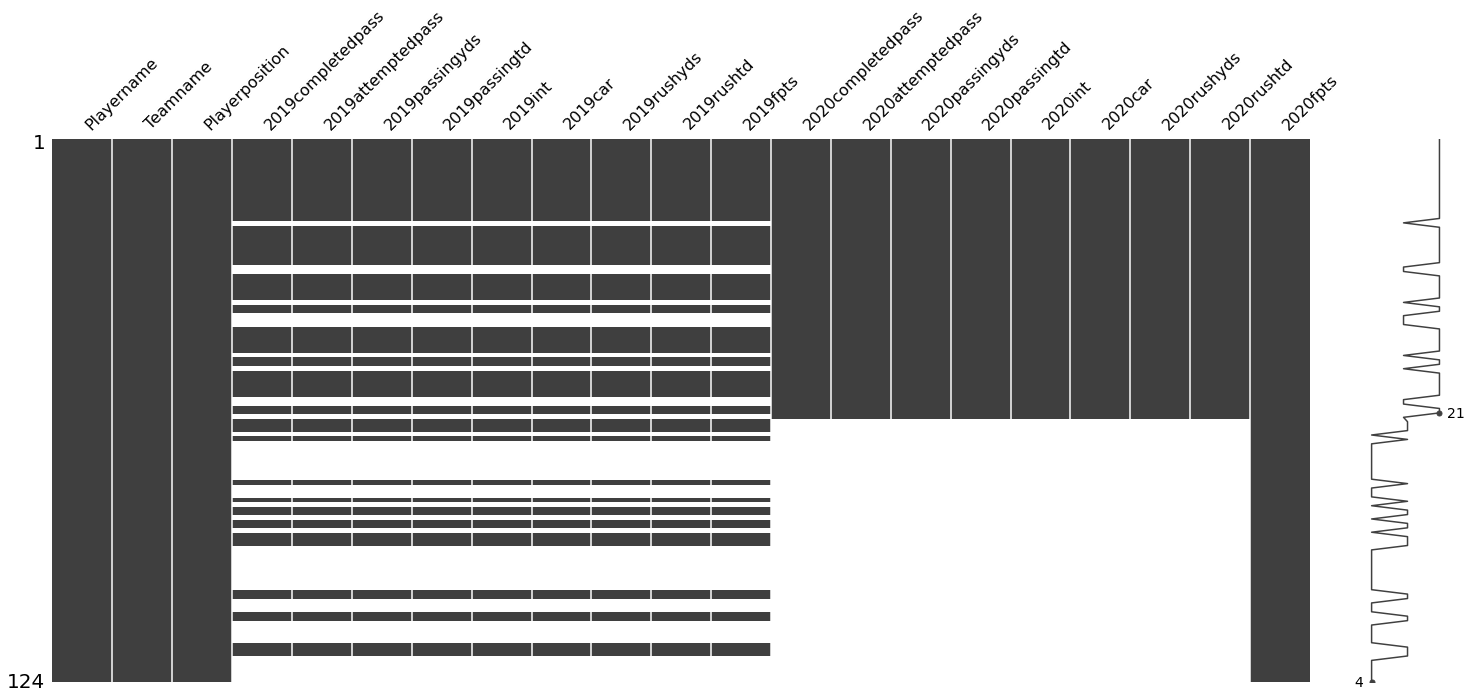

In [16]:
msno.matrix(df) # print a missing numbers matrix to show where missing numbers are

In [17]:
df[df['2019fpts'].isna()] # shows missing values from '2019fpts' column

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2019fpts,2020completedpass,2020attemptedpass,2020passingyds,2020passingtd,2020int,2020car,2020rushyds,2020rushtd,2020fpts
19,Joe Burrow,Bengals,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,328.0,527.0,3687.0,20.0,13.0,54.0,258.0,2.0,232.82
29,Tua Tagovailoa,Dolphins,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,288.0,467.0,3263.0,17.0,12.0,35.0,139.0,1.0,190.55
30,Justin Herbert,Chargers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,265.0,421.0,3069.0,16.0,11.0,40.0,157.0,1.0,182.23
37,P.J. Walker,Panthers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,57.0,97.0,656.0,3.0,3.0,7.0,29.0,0.0,37.48
40,Jalen Hurts,Eagles,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,26.0,43.0,301.0,2.0,1.0,12.0,68.0,1.0,27.61
41,Joshua Dobbs,Jaguars,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,39.0,65.0,425.0,2.0,2.0,3.0,13.0,0.0,22.57
42,Blaine Gabbert,Buccaneers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.0,46.0,339.0,2.0,2.0,2.0,9.0,0.0,20.63
49,Geno Smith,Seahawks,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,27.0,188.0,2.0,1.0,1.0,3.0,0.0,12.48
52,Chad Henne,Chiefs,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,29.0,188.0,2.0,1.0,1.0,4.0,0.0,11.97
59,Jordan Love,Packers,QB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,16.0,27.0,183.0,1.0,1.0,1.0,5.0,0.0,10.87


In [18]:
df = df.fillna(0) # use the .fillna() method to fill the NaNs with zeros

In [19]:
df.tail() # check out the last 5 rows in the dataset to ensure this filling of null values stuck

,Playername,Teamname,Playerposition,2019completedpass,2019attemptedpass,2019passingyds,2019passingtd,2019int,2019car,2019rushyds,...,2019fpts,2020completedpass,2020attemptedpass,2020passingyds,2020passingtd,2020int,2020car,2020rushyds,2020rushtd,2020fpts
119,Matt Cassel,FA,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,Mark Sanchez,FA,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
121,Sam Bradford,FA,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,Nick Fitzgerald,FA,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,Tyree Jackson,Bills,QB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Export the dataframe to a csv

In [20]:
df.to_csv('/Users/erminamujan/Downloads/cleaned_qb_stats_and_projections.csv')